In [1]:
from molass.Global.Options import set_molass_options
set_molass_options(flowchange='auto')
from molass_data import SAMPLE1
from molass.DataObjects import SecSaxsData as SSD

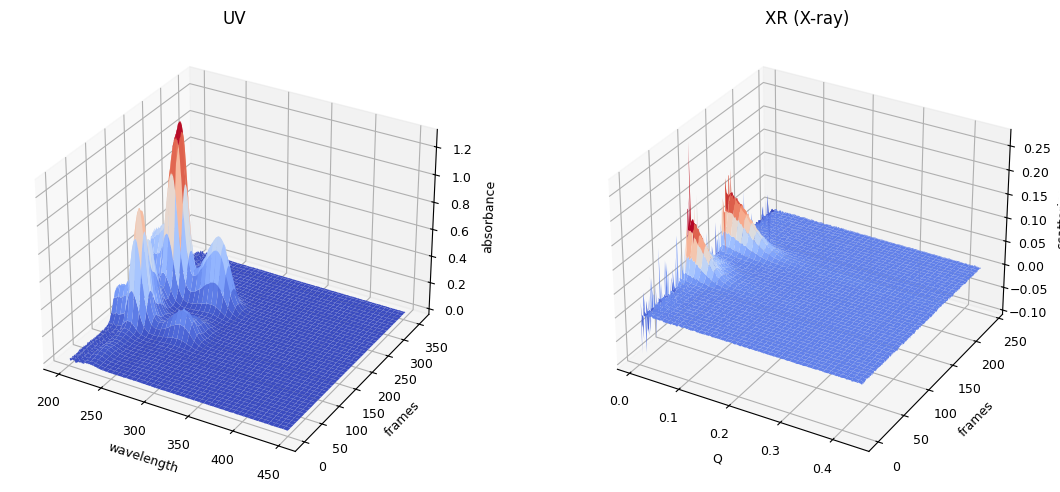

In [2]:
ssd = SSD(SAMPLE1)
ssd.plot_3d();

zeros at the angular ends of error data have been replaced with the adjacent values.


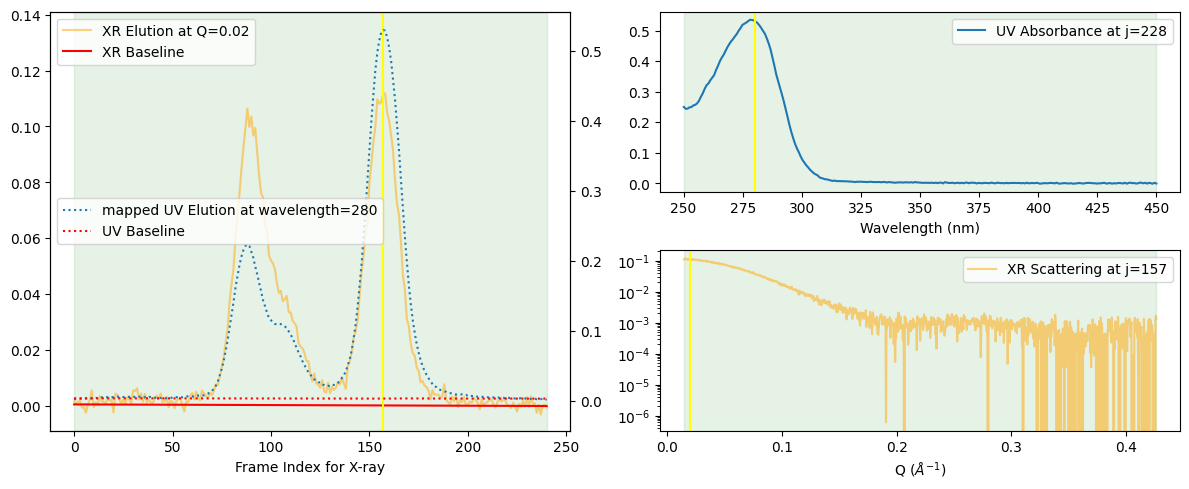

In [3]:
trimmed_ssd = ssd.trimmed_copy()
trimmed_ssd.set_baseline_method(('linear', 'uvdiff'))
trimmed_ssd.plot_compact(baseline=True);

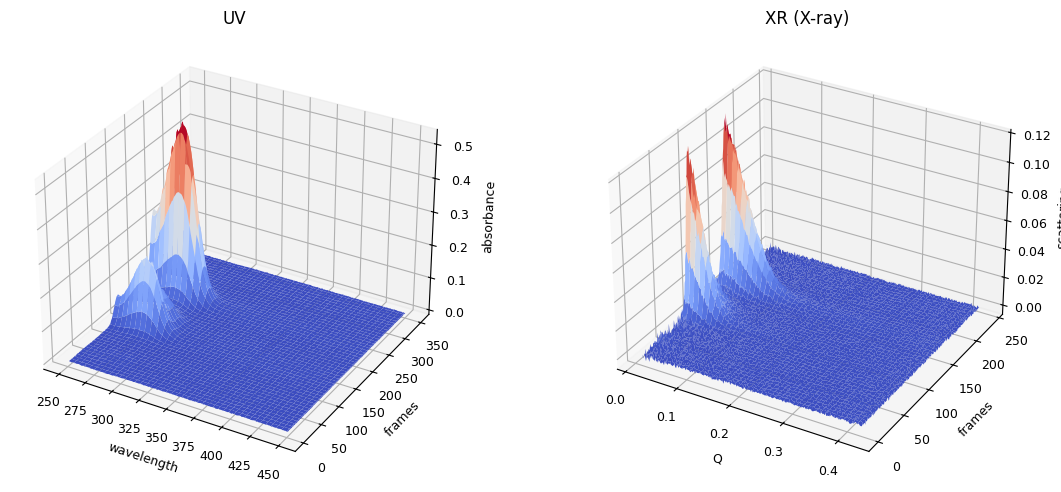

In [4]:
corrected_ssd = trimmed_ssd.corrected_copy()
corrected_ssd.plot_3d();

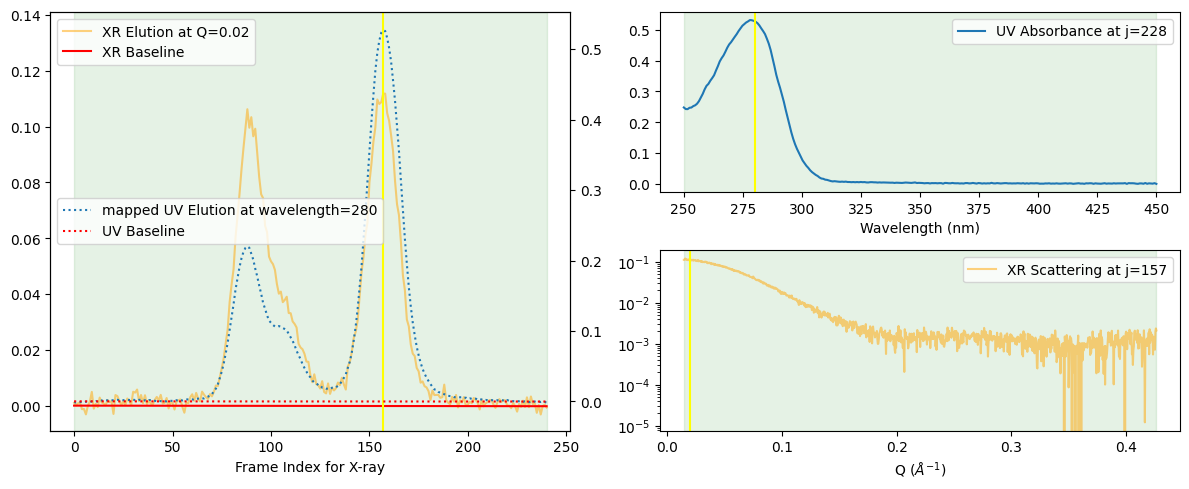

In [5]:
corrected_ssd.plot_compact(baseline=True);

developer memo: remember that "LowRank.CoupledAdjuster.select_components" is not implemented yet.
100%|██████████| 241/241 [01:03<00:00,  3.82it/s]


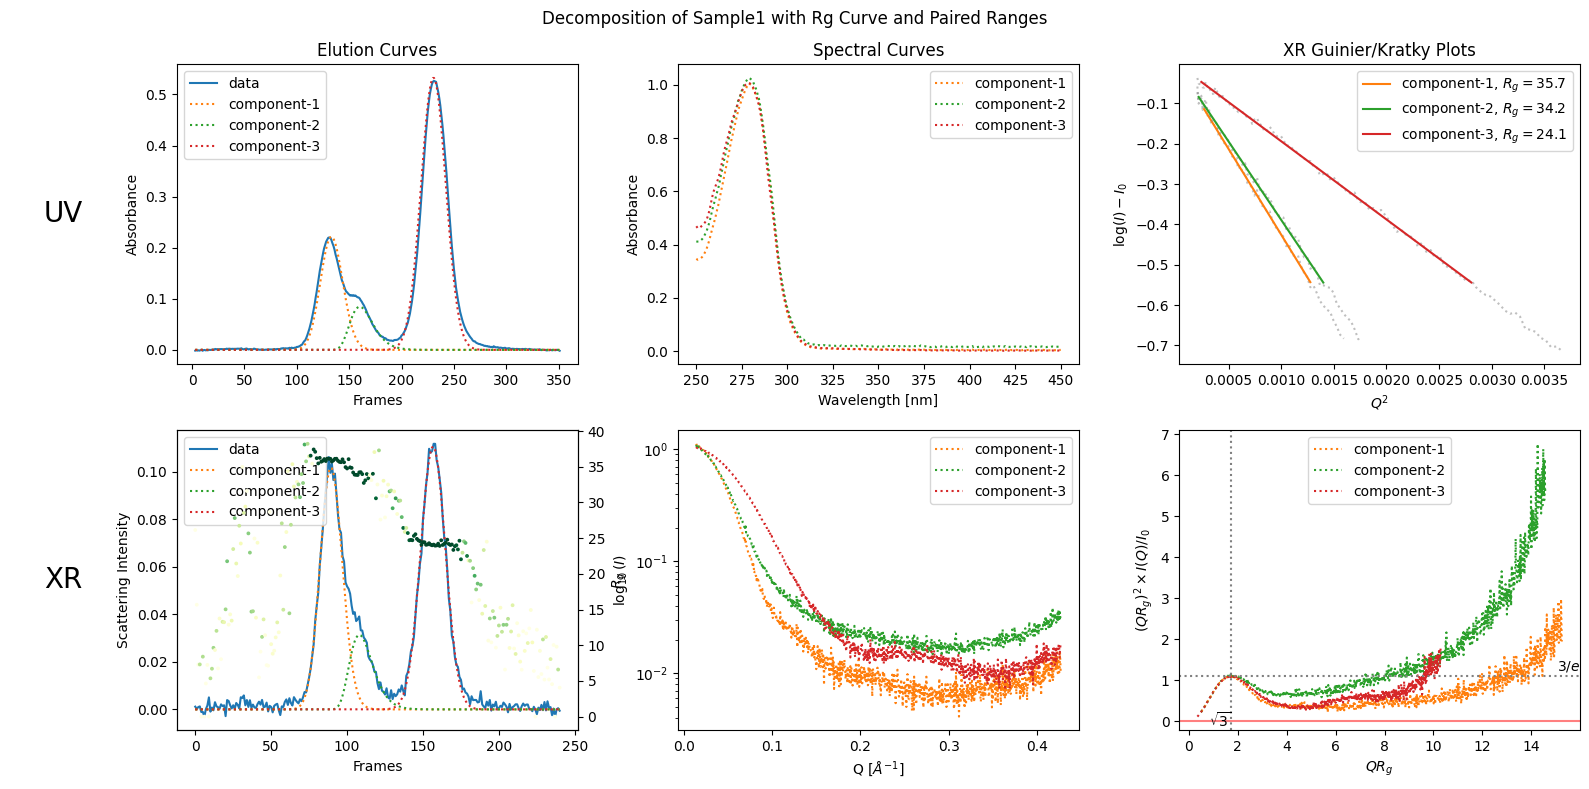

In [6]:
decomposition = corrected_ssd.quick_decomposition(num_components=3)
rgcurve = corrected_ssd.xr.compute_rgcurve()
pairedranges = decomposition.get_pairedranges()
plot1 = decomposition.plot_components(title="Decomposition of Sample1 with Rg Curve and Paired Ranges",
                                      rgcurve=rgcurve, pairedranges=pairedranges)

In [ ]:
rgcurve_atsas = corrected_ssd.xr.compute_rgcurve_atsas()

 11%|█         | 27/241 [00:12<01:05,  3.28it/s]

In [ ]:
mapping = corrected_ssd.estimate_mapping()
concentration = corrected_ssd.compute_concentration(mapping, debug=True)

In [ ]:
import molass.Reports.ReportUtils
from importlib import reload
reload(molass.Reports.ReportUtils)
from molass.Reports.ReportUtils import make_v1report

rgcurves = rgcurve, rgcurve_atsas
make_v1report(corrected_ssd, concentration=concentration, rgcurves=rgcurves, decomposition=decomposition, ranges=pairedranges, debug=True)